# <span style="color:#F72585"><center>Distribuciones Muestrales</center></span>



<figure>
<center>
<img src="../Imagenes/toro.png" width="500" height="500" align="center" /> 
<figcaption>Muestras de la Distribución Bivariada von Mises cosine </figcaption>
</center>   
</figure>

<a href="https://commons.wikimedia.org/wiki/File:Bivariate_von_Mises_distribution_cosine_samples.svg">Gumbys</a>, <a href="https://creativecommons.org/licenses/by/3.0">CC BY 3.0</a>, via Wikimedia Commons

## <span style="color:#4361EE">Referencias</span>

1. [Dobson y Baernett, An introduction oto Generalizer Linear Modesl](http://library.lol/main/472B57FA461867F6CFB4334BFED60010)

## <span style="color:#4361EE">Introducción</span>

En esta lección revisamos las distribucionesmá utilizadas en los proceso de inferencia estadística clásica.


## <span style="color:#4361EE">Distribuciones  Normales o Gaussianas</span> 

### <span style="color:#4CC9F0">Distribución Normal Univariada</span>

Si una variable aleatoria $Y$ tiene distribución normal, con media $\mu$ y varianza $\sigma^2$, su función de densidad de probabilidad es dada por

$$
f(y|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \text{exp} \left[-\frac{1}{2} \left(\frac{(x-\mu)}{\sigma} \right)^2 \right].
$$

Escribimos $Y\sim N(\mu,\sigma^2)$. Si $ \mu=0$ y $\sigma^2=1$ se llama distribución normal estándar.


### <span style="color:#4CC9F0">Distribución Normal Multivariada</span>

Si $Y_i\sim N(\mu_i, \sigma_i^2)$ para $i=1,\ldots, n$ y tal que

$$
cov(Y_i, Y_j) =  \rho_{ij}\sigma_i\sigma_j
$$

en donde $\rho_{ij}$ es el coeficiente de correlación ente $Y_i$ y $Y_j$. Entonces la distribución conjunta de las $Y_i$'s es normal multivariada con media $\boldsymbol{\mu} = (\mu_1,\ldots, \mu_n)$ y matriz de covarianza $\mathbf{V}$. Lo elemento diagonales de $\mathbf{V}$  son $\sigma_i^2$ y  los elementos no diagonales $ij$ son $\rho_{ij}\sigma_i\sigma_j$. Escribimos $Y= Y_1, \ldots, Y_n$ y además $Y \sim N(\boldsymbol{\mu}, \mathbf{V})$.


#### <span style="color:#4CC9F0">Graficos de muestras de distribuciones normal Multivariadas</span>

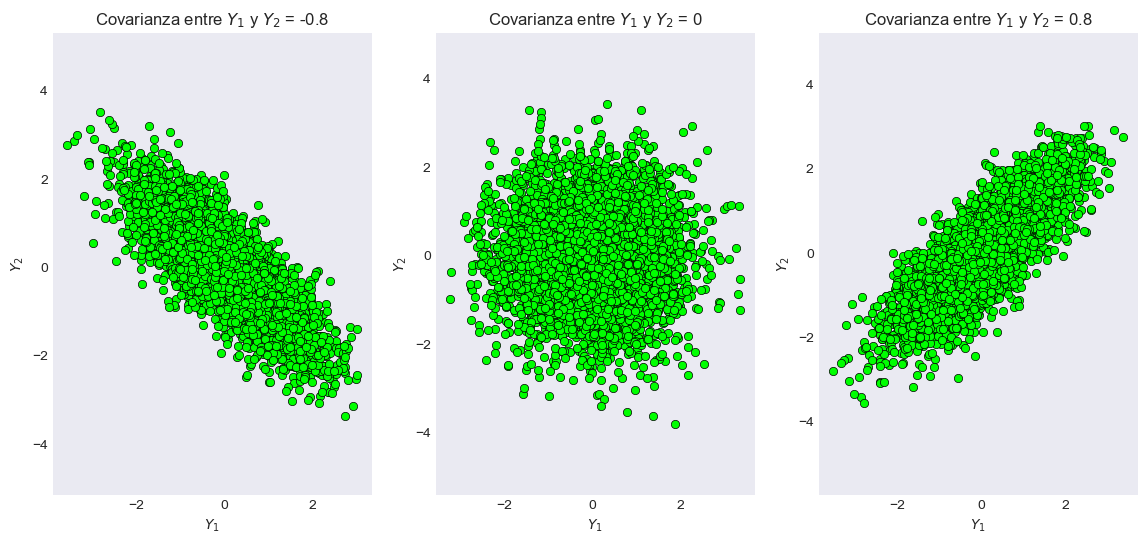

In [6]:
# librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
 
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
 
# raíz para valores aleatorios
random_seed=1000
 
# lista de varianzas
# valores de covariazna
cov_val = [-0.8, 0, 0.8]
 
# configura media d ela distribución
# be at (0,0)
mean = np.array([0,0])
 
# Itera sobre diferentes matrices de covarianza
for idx, val in enumerate(cov_val):
    plt.subplot(1,3,idx+1)
     
    # Incializa la matriz de covarianza
    cov = np.array([[1, val], [val, 1]])
     
    # Generala distribución Gaussiana bivariada
    # con medi y matriz de covarianza dadas
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Genera 5000 muestras d ela distribución
    data = distr.rvs(size = 5000)
     
    # Dibuja las muestras genradas
    plt.plot(data[:,0],data[:,1], 'o', c='lime',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
    plt.title(f'Covarianza entre $Y_1$ y $Y_2$ = {val}')
    plt.xlabel('$Y_1$')
    plt.ylabel('$Y_2$')
    plt.axis('equal')
     
plt.show()

#### <span style="color:#4CC9F0">Graficos de densidades de  distribuciones normal Multivariadas</span>

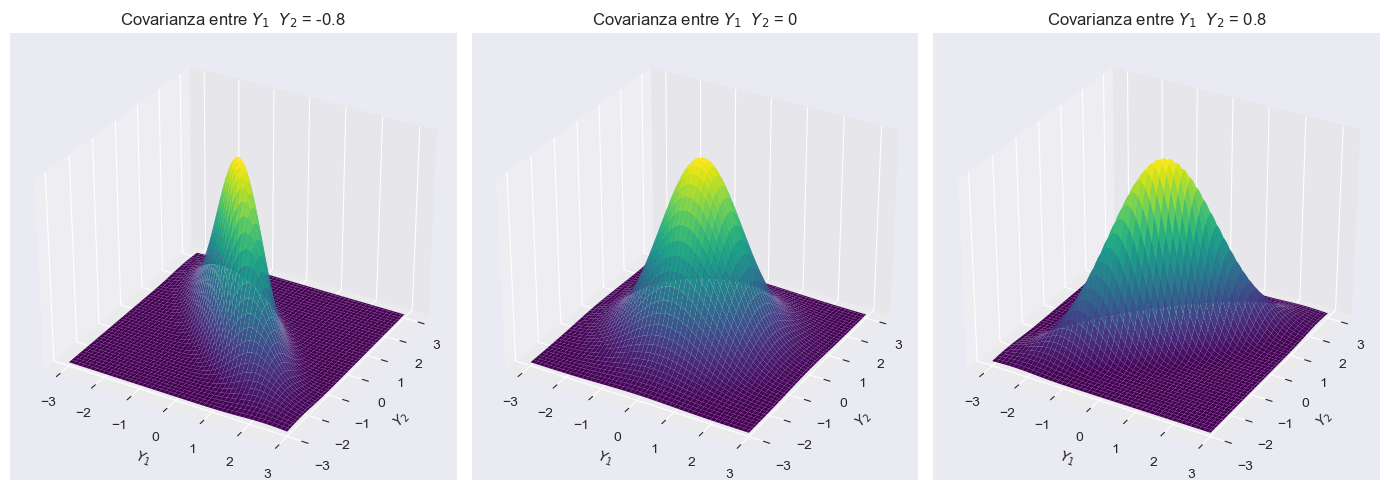

In [7]:
# librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
 
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()
 
# Incializa semilla para números aleatorios
random_seed=1000
 
# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]
 
# Configura la media
# to be at (0,0)
mean = np.array([0,0])
 
# almacena valores de la función
pdf_list = []
 
# itera sobre diferentes matrices de covarianza
for idx, val in enumerate(cov_val):
     
    # Inicializa matriz de covarianza
    cov = np.array([[1, val], [val, 1]])
     
    # Genera la densidad Gaussina bivariada
    # con media y covaranza dadas
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Genera una grilla para graficas
    # frontera  3-sigma
    mean_1, mean_2 = mean[0], mean[1]
    sigma_1, sigma_2 = cov[0,0], cov[1,1]
     
    x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
    y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
    X, Y = np.meshgrid(x,y)
     
    # Genera la funcipon de densidad
    # para cada punto en la grilla
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
     
    # dibuja lkos valores de la fucnipon de densidad
    key = 131+idx
    ax = fig.add_subplot(key, projection = '3d')
    ax.plot_surface(X, Y, pdf, cmap = 'viridis')
    plt.xlabel("$Y_1$")
    plt.ylabel("$Y_2$")
    plt.title(f'Covarianza entre $Y_1$  $Y_2$ = {val}')
    pdf_list.append(pdf)
    ax.axes.zaxis.set_ticks([])
 
plt.tight_layout()
plt.show()

 #### <span style="color:#4CC9F0">Graficos de contornos de distribuciones normales multivariadas</span>

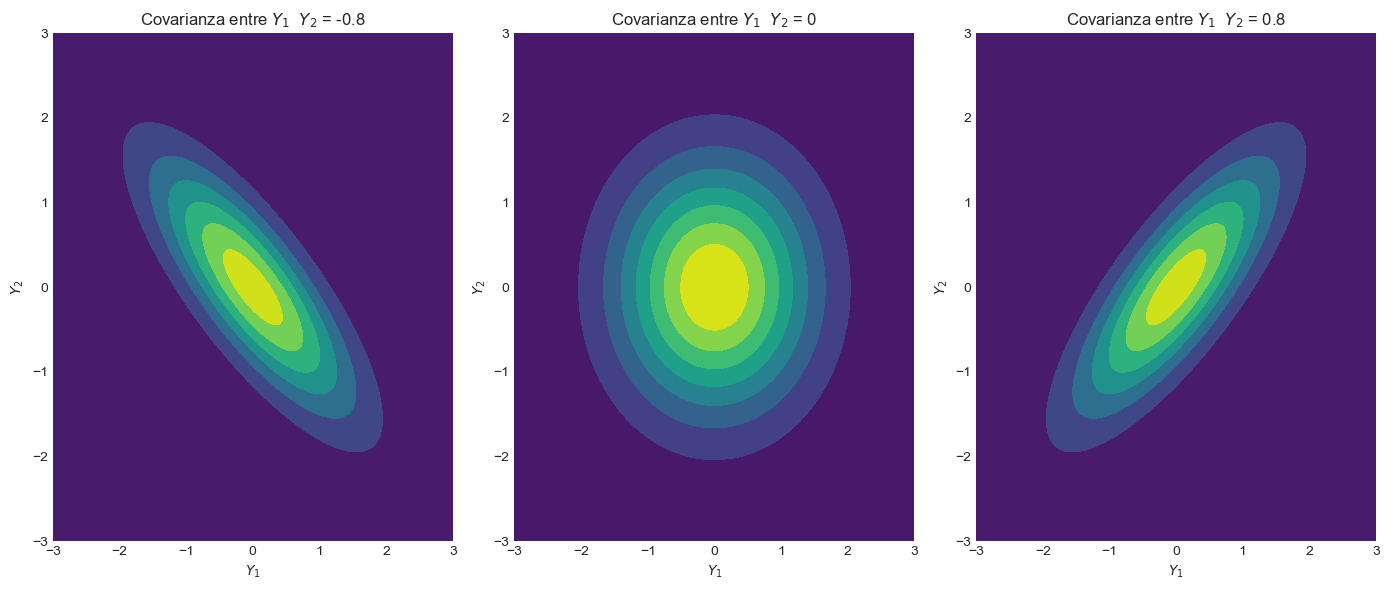

In [8]:
# Dibuja contornos
for idx, val in enumerate(pdf_list):
    plt.subplot(1,3,idx+1)
    plt.contourf(X, Y, val, cmap='viridis')
    plt.xlabel("$Y_1$")
    plt.ylabel("$Y_2$")
    plt.title(f'Covarianza entre $Y_1$  $Y_2$ = {cov_val[idx]}')
plt.tight_layout()
plt.show()

## <span style="color:#4361EE">Distribución Chi cuadrado</span> 

**La distribución chi-cuadrado con n grados de libertad** es definida como la distribución d la suma de $n$ variables normales elevadas al cuadrad, digamos $Z_i^2$ para $i=1,\ldots, n$. LA distribución se denota $\chi^2(n)$. Si una variable $Y \sim \chi^2(n)$, entonces la esperanza y la varianza son respectivamente

$$
\begin{align}
E[Y] &= n\\
Var[Y] &=  2n
\end{align}
$$

Además

$$
Y = \sum_{i=1}^n Z_i^2
$$

El valor $n$ se llama grados de libertad de la distribución.

La imagen muestra la función de densidad de la  distribución $\chi^2(4)$.


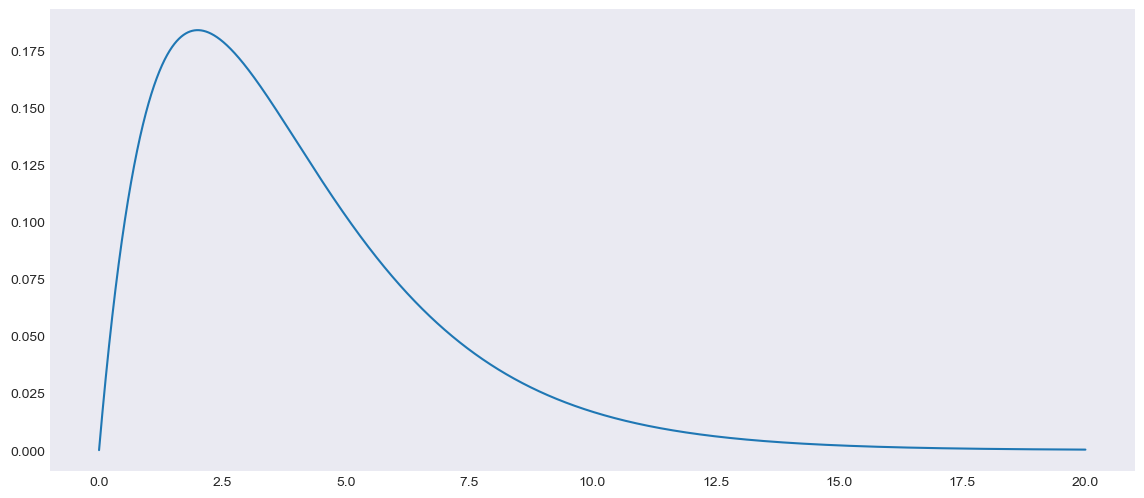

In [10]:
#x-axis ranges from 0 to 20 with .001 steps
from scipy.stats import chi2
x = np.arange(0, 20, 0.001)

#plot Chi-square distribution with 4 degrees of freedom
plt.plot(x, chi2.pdf(x, df=4))
plt.show()

In [1]:
# calcula los primeros cuatro momentos
import numpy as np
from scipy.stats import chi2

df = 4
chi = chi2(df)

mean, var, skew, kurt = chi.stats( moments='mvsk')
print('Distribución chi2({})'.format(df))
print('media = {}, varianza = {}'. format(mean, var))
print('sesgo = {}, curtosis = {}'.format(skew, kurt))

Distribución chi2(4)
media = 4.0, varianza = 8.0
sesgo = 1.4142135623730951, curtosis = 3.0


### <span style="color:#4CC9F0">Propiedad reproductiva de la distribución Chi cuadrado</span>

Si $Y_1 \sim  \chi^2(k)$ y $Y_1 \sim \chi^2(m)$, entonces

$$
Y_1 + Y_2 \sim  \chi^2(k+m)
$$

## <span style="color:#4361EE">Distribución t</span> 

La **distribución t** con $n$ grados de libertad es definida como el cociente de dos variables aleatorias independientes. El numerador tiene distribución normal estándar. El denominador es la raíz cuadrada de una variable aleatoria  $\chi^2$ dividida sobre sus grados de libertad. Así, si $Z\sim N(0,1)$ y $Y\sim \chi^2(n)$, entonces

$$
T = \frac{Z}{\sqrt{Y/n}}
$$

tiene distribucion $t$ con $n$ grados de libertad  y se denota $T \sim t(n)$

distribución t(2): mean = 0.0, var = inf, skew = nan, kurtosis = nan


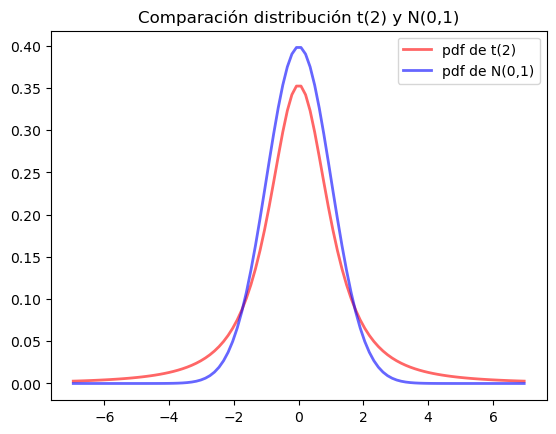

In [23]:
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

df = 2
mean, var, skew, kurt = t.stats(df, moments='mvsk')

print('distribución t(2): mean = {}, var = {}, skew = {}, kurtosis = {}'.format(mean, var, skew, kurt))

x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
ax.plot(x, t.pdf(x, df),
       'r-', lw=2, alpha=0.6, label='pdf de t(2)')
ax.plot(x, norm.pdf(x),
       'b', lw=2, alpha=0.6, label='pdf de N(0,1)')
ax.legend()
plt.title('Comparación distribución t(2) y N(0,1)')
plt.show()

## <span style="color:#4361EE">Distribución F</span> 

La distribución $F(n,m)$ con $n$ y $m$ grados de libertad se definida como la distribución del cociente de  dos variables aleatorias independientes $\chi^2$ divididas cada una por sus grados de libertad. Espcíficamente Si $X_1^2 \sim \chi^2(n)$ y $X_2^2 \sim \chi^2(m)$, entonces la variable aleatoria $F$ definda por

$$
F = \frac{X_1^2/n}{X_2^2/m}
$$

tiene distibución $F(n, m)$. Escribimos $F \sim F(n,m )$.

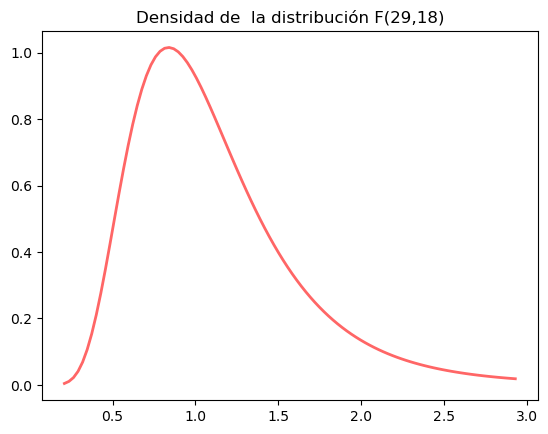

In [10]:
#
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt

# instancia un objeto f
dfn, dfd = 29, 18
f_d = f(dfn, dfd)

fig, ax = plt.subplots(1, 1)
x = np.linspace(f_d.ppf(0.0001),  f_d.ppf(0.99), 100)
ax.plot(x, f_d.pdf(x), 'r-', lw=2, alpha=0.6, label='f pdf')
plt.title('Densidad de  la distribución F({},{})'.format(dfn, dfd ))
plt.show()

In [21]:
# calcula los primeros cuatro momentos
import numpy as np
from scipy.stats import f

dfn, dfd = 29, 18
f_d = f(dfn, dfd)
mean, var, skew, kurt = f_d.stats( moments='mvsk')
print('Distribución F({},{})'.format(dfn, dfd))
print('Media = {}, varianza = {}'. format(mean, var))
print('sesgo = {}, curtosis = {}'.format(skew, kurt))

Distribución F(29,18)
Media = 1.125, varianza = 0.2805572660098522
sesgo = 1.8065676503195025, curtosis = 7.074636015325671


## <span style="color:#4361EE">Estadísticas para evaluacion de ajuste de modelos en Statmodels</span>

## <span style="color:#4361EE">Interpretación de la salida de la regresión </span>

Para esta sección usaremos la salida de un moldeo de Poisson, en donde Temperatura, Humedad son variables explicativas y Conteo la variable explicada respectivamente.

In [26]:
# librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# datos
parasitos = {'Temperatura':[15,16,24,13,21,16,22,18,20,16,28,27,13,22,23],
             'Humedad': [70,65,71,64,84,86,72,84,71,75,84,79,80,76,88],
             'Conteo':[156,157,177,145,197,184,172,187,157,169,200,193,167,170,192]}
parasitos = pd.DataFrame(parasitos)

# prepara los datos para la regresión
X = parasitos.drop("Conteo", axis=1)
y = parasitos.Conteo
nomb_caract = X.columns.to_list()

# escala las características (variables)
standizer = StandardScaler()
X = standizer.fit_transform(X)

# revisa número de valores únicos en cada característica
print('Número de valores únicos por variable\n', parasitos.select_dtypes("int").nunique())

# ajusta un modelo de regresión de Poisson a los datos
exog = sm.add_constant(X)
poission_model = sm.GLM(y, exog, family=sm.families.Poisson())
result = poission_model.fit()
result.summary(xname=['Intercepto'] + nomb_caract)

Número de valores únicos por variable
 Temperatura    11
Humedad        12
Conteo         14
dtype: int64


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Conteo   No. Observations:                   15
Model:                            GLM   Df Residuals:                       12
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53.462
Date:                Sun, 20 Nov 2022   Deviance:                       1.9468
Time:                        16:03:14   Pearson chi2:                     1.94
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7536
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercepto      5.1600      0.020    263.202      0.000       5.122       5.198
Temperatura     0.0417      0.021      2.018      0.044       0.001       0.082
Humedad         0.0664      0.021      3.163      0.002       0.025       0.108
===============================================================================
"""

### <span style="color:#4CC9F0">Coeficientes y p-valores</span>

1. La estimación de los coeficientes , `coef`, en la salida indica el cambio en el logaritmo de los $\mu_i$, es decir en el logaritmo de la predicciones del modelos. Por ejemplo, un aumento de una unidad en la variable predictora *Temperatura* está asociado con un cambio promedio de 0.0417 en el logaritmo de la variable de respuesta *Conteo*, manteniendo la variable *Humedad* sin ningún cambio. Esto significa que los valores más altos de *Temperatura* están asociados con una mayor probabilidad de la variable *Conteo*.

1. El error estándar, `std err` da una idea de la variabilidad asociada con la estimación del coeficiente. Puede interpretar el error estándar como una estimación  desviación estándar de la distribución posterior del respectivo coeficiente.

1. `El valor z`. Se obtiene al dividir la estimación del coeficiente por el error estándar.
1. El `p- valor` Pr(>|z|)  dice la probabilidad asociada con un valor *z* particular. Básicamente, esta probabilidad nos dice qué tan bien cada variable predictora puede predecir el valor de la variable de respuesta en el modelo. Por ejemplo, el p-valor asociado con el valor *z* para la variable *Temperatura* es .044. Dado que este valor es inferior a 0,05, diríamos que *Temperatura* es una variable predictora estadísticamente significativa en el modelo. 
1. `Intervalo de confianza`: [0.025, 0.975]. Es una estimación por intervalo del 95%. La salida en esta caso no puede interpretarse directamente como un intervalo de credibilidad, pero es una aproximación razonable. En el ejemplo el intervalos de confianza reportado para el parámetro *Temperatura* es [0.001, 0.082].


### <span style="color:#4CC9F0">Bondad de ajuste</span>

Las medidas de bondad de ajuste indican que tan bien ajusta el modelo a los datos. Si no está acostubrado o acostumbrada a estas medidas revise las siguientes  secciones.


### <span style="color:#4CC9F0">Estadística Chi cuadrado de Person: $X^2$</span>

Si $y_i$ representan los valores observados y $\hat{y}_i$ los valores predichos por el modelo, la estadísitca $X^2$ se define por

$$
X^2 = \sum_i \frac{(y_i -  \hat{y}_i)^2}{\hat{y}_i}
$$

Asintóticamente se tiene que si el modelo ajusta bien a los datos, entonces aproximadamente  $X^2 \sim \chi^2(p-1)$. En donde  $p$ el número de parámetros.

La deviance del modelo y la estadística $X^2$ coinciden asintóticamente en distribución. En el ejemplo $p=3$, por lo que si las cosas van bien $X^2 \sim \chi^2(2) $. Por lo que una valor de 1.94 indica un bueb ajuste global del modelo a los datos.

### <span style="color:#4CC9F0">Pseudo $R^2$</span>

Si $l$ es la función log verosimiltud de un modelo, $\tilde{\mu}$ la estimación parámetro minimal de un modelo, por lo general el intercepto, $\hat{\mu}$ la estimación del modelo bajo estudio, entonces

$$
\text{pseudo} R^2 = \frac{l(\tilde{\mu},y) -l(\hat{\mu},y) }{l(\tilde{\mu},y)}
$$

$\text{pseudo} R^2$ representa la mejora del modelo en relación con el modelo nulo. Es análogo al $R^2$ de la regresión lineal clasica. 

- **Interpretación**. Valores cercanos a 1, indican un buen ajuste del modelo.

En ejemplo el valor el valor de 0.75 indican un ajuste aceptable del modelo a los datos.


#### <span style="color:#4CC9F0">Sobre la Deviance</span>

Las medidas de bondad de ajuste indican que tan bien ajusta el modelo a los datos. Si no está acostumbrado o acostumbrada a estas medidas revise las siguientes dos secciones.

Supongamos que en un modelo estadístico $\boldsymbol{\beta}$ denota el vector de parámetros del modelo. Con $\boldsymbol{\beta}_{max}$ denotamos el vector de parámetros  con el  máximo de posibles parámetros en el modelo. En este caso $\boldsymbol{\beta}_{max}$ por lo general corresponde al caso en el cual se toma $\mu_i = y_i$. Técnicamente la deviance para un modelo es definida por 

$$
\text{deviance} = -2\left[\log p(\mathbf{y}|\hat{\boldsymbol{\beta}}_{max},\mathbf{X} ) - \log p(\mathbf{y}|\hat{\boldsymbol{\beta}}, \mathbf{X}) \right].
$$

En la expresión de la deviance $\hat{\boldsymbol{\beta}}$ es la estimación de $\boldsymbol{\beta}$.

La deviance es una variable aleatoria que tiene aproximadamente distribución $\chi^2(n-p)$, en donde $n$ es el tamaño del vector $\boldsymbol{\beta}_{max}$ y $p$ el tamaño del vector $\boldsymbol{\beta}$.

En la distribución $\chi^2(k)$, el parámetro $k$ se llama grados de libertad (`Df`). La esperanza de la distribución $\chi^2(k)$ es $k$.


#### <span style="color:#4CC9F0">Como interpretar  la Deviance</span>

La deviance debe interpretarse junto con los grados de libertad reportados. En el ejemplo se tiene que la deviance es 1.9468 con $k=2$ grados de libertad. La idea central es la siguiente:

**Si el modelo ajusta bien a los datos, la deviance debe estar cerca de los grados de libertad del modelo**

En nuestro ejemplo parece ser así, pero en realidad no estamos seguros. Para resolver el problema de si en realidad  1.9468 está estadísticamente cerca de 2, calculamos el intervalo del 95% de la distribución $\chi^2(2)$. Si el valor 1.9468 queda en ese intervalo, estamos tranquilos. Hagamos el cálculo. En realidad la deviance en este caso nos permite descartar un modelo. Si por ejemplo la deviance del modelo en el ejemplo es 8, definitivamente el modelo no es correcto y es necesario pensar en un nuevo modelo


In [2]:
import numpy as np
from scipy.stats import chi2

k = 2
chi = chi2(k)

LCI,UCI = chi.interval(0.95)
print(np.round(LCI,2),np.round(UCI))

0.05 7.0


### <span style="color:#4CC9F0">Deviance residual</span>

La "deviance residual" (deviance del residual) es una medida utilizada en modelos de regresión generalizada (GLM por sus siglas en inglés) para evaluar qué tan bien bien se ajusta el modelo a los datos. En un GLM, la deviance residual se utiliza para comparar el ajuste del modelo con respecto a un modelo nulo (un modelo que no tiene covariables) y, por lo tanto, se utiliza para evaluar si el modelo proporciona una mejora significativa en la explicación de la variabilidad en los datos.

La deviance residual se calcula mediante la siguiente fórmula:

$$
D_i = 2(l_i - l_0)
$$

Donde:

* $D_i$   es el deviance residual para la i-ésima observación.
* $l_i$   es el logaritmo de la verosimilitud para la i-ésima observación bajo el modelo ajustado.
* $l_0$   es el logaritmo de la verosimilitud para la i-ésima observación bajo el modelo nulo (sin covariables).

El valor de la deviance residual se compara con una distribución chi-cuadrado para determinar si el modelo ajustado es significativamente mejor que el modelo nulo. En general, cuanto mayor sea el valor absoluto de la deviance residual, mejor se ajusta el modelo a los datos en comparación con el modelo nulo.

Si el deviance residual es positivo, significa que el modelo ajustado es peor que el modelo nulo para esa observación, lo que sugiere que el modelo no está explicando bien la variabilidad en los datos. Si es negativo, el modelo ajustado es mejor que el modelo nulo para esa observación.

En resumen, el deviance residual en un modelo GLM es una medida importante para evaluar la bondad de ajuste del modelo y su capacidad para explicar la variabilidad en los datos. Un deviance residual bajo y negativo indica un buen ajuste del modelo, mientras que un deviance residual alto y positivo indica un mal ajuste.

La deviance residual es útil para ser utlizada en gráficos de análisi de residuales de  un modelo.


### <span style="color:#4CC9F0">Deviance del modelo</span>

La "deviance del modelo" (model deviance) es una medida importante en modelos de regresión generalizada (GLM) que se utiliza para evaluar que tan bien el modelo se ajusta a los datos. La deviance del modelo se calcula como una medida de ajuste y se compara con la deviance nula (null deviance) para determinar si el modelo proporciona una mejora significativa en la explicación de la variabilidad en los datos en comparación con un modelo nulo (modelo que incluye solo el intercepto y no tiene covariables).

Matemáticamente, la deviance del modelo se calcula como la diferencia entre el logaritmo de la verosimilitud (likelihood) bajo el modelo ajustado y el logaritmo de la verosimilitud bajo el modelo nulo, multiplicada por 2. La fórmula es la siguiente:

$$
D_{\text{modelo}} = -2(\mathfrak{l}(\text{modelo nulo}) - \mathfrak{l}(\text{modelo ajustado}))
$$
en donde:

* $D_{\text{modelo}}$ es la deviance del modelo.
* $\mathfrak{l}(\text{modelo nulo})$ es el logaritmo de la verosimilitud bajo el modelo nulo (modelo más simple). Usualmente un modelo con intercepto únicamente.
* $\mathfrak{l}(\text{modelo ajustado})$ es el logaritmo de la verosimilitud bajo el modelo ajustado (modelo que incluye covariables).

La deviance del modelo se utiliza para evaluar si el modelo ajustado proporciona una mejora significativa en la explicación de la variabilidad en los datos en comparación con el modelo nulo. En general, un valor más bajo de deviance del modelo indica un mejor ajuste del modelo a los datos. La diferencia entre la deviance nula y la deviance del modelo se utiliza para realizar pruebas estadísticas para determinar si el modelo es estadísticamente significativo.

En resumen, la deviance del modelo es una medida que se utiliza para evaluar la calidad del ajuste de un modelo en comparación con un modelo nulo y determinar si el modelo proporciona una mejora significativa en la explicación de los datos.




#### <span style="color:#4CC9F0">Distribución asintótica de la Deviance del modelo</span>

Si el modelo ajusta bien a los datos se tiene que asintóticamente $D_{\text{modelo}} \sim \chi^2(p-1)$. En donde  $p$ el número de parámetros.

La deviance del modelo y la estadística $X^2$ coinciden asintóticamente en distribución. En el ejemplo $p=3$, por lo que si las cosas van bien $D_{\text{modelo}} \sim \chi^2(2) $. Por lo que una valor de 1.9468 indica un buen ajuste global del modelo a los datos.